El tiempo que el sistma tarda en dar una vuelta completa es:  0.1776861814761729  segundos. , Por tanto, el tiempo que tarda en llegar al final de su sexto ciclo es:  1.0661170888570375  segundos. Sabiendo esto, se puede afirmar que la amplitud de la vibración subamortiguada al final del sexto ciclo es igual a  0.28242953648100005  metros.


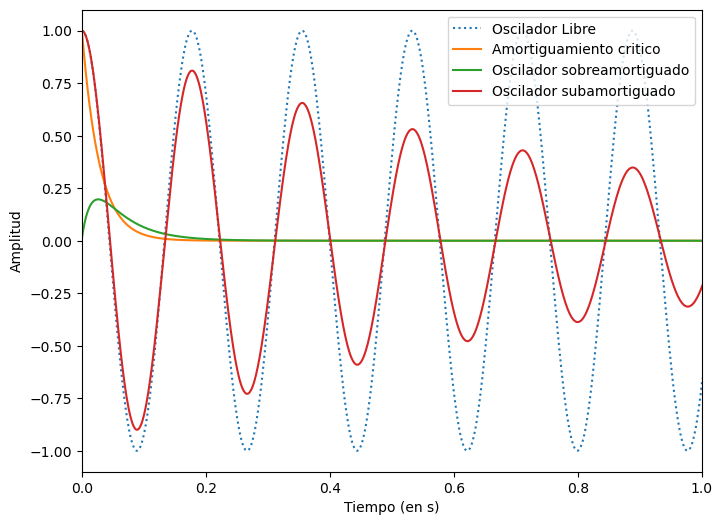

In [33]:
import numpy as np
import matplotlib.pyplot as plt

cic=6
xo = 1
xvo = 0
to = 0
tf = 5
b = 0.30
h = 0.30
L = 2.5
m = 16.25/9.81
E = 2000000
I = b*h**3/12
keq = 24*E*I/L**3
w = (keq/m)**0.5
T = 2*np.pi/w
dd = np.log(1/0.81)
delta = 0.001
zz_sob = 1.15
zz_sub = (dd**2/(4*np.pi**2+dd**2))**0.5
c = zz_sub*2*m*w
Tzz = 2*np.pi/(w*(1-zz_sub**2)**0.5)
t = tf - to
ws = w * (zz_sob**2 - 1)**0.5
TD_sub=2*np.pi/(w*(1-zz_sub**2)**0.5)

t_cic=TD_sub*cic
xt = np.zeros(int(t/delta))
xl = np.zeros(int(t/delta))
xn = np.zeros(int(t/delta))
xt_sob = np.zeros(int(t/delta))
xt_sub = np.zeros(int(t/delta))
x_cic=np.exp(-zz_sub*w*t_cic) * ((xo*np.cos(w*(1-zz_sub**2)**0.5*t_cic)) + ((xvo + zz_sub*w*xo)/(w*(1-zz_sub**2)**0.5)) * np.sin(w*(1-zz_sub**2)**0.5*t_cic))
j = 0
for i in np.arange(to, tf, delta):
    xo = 1
    xn[j] = i
    xl[j] = (xo*np.cos(w*i)) + (xvo*np.sin(w*i)/w)
    xt[j] = xo * np.exp(-w*(i))
    xt_sob[j] = ((-xvo - xo*(-zz_sob*w + ws))/((-zz_sob*w + ws) - (zz_sob*w - ws))) * np.exp((-zz_sob*w - ws)*i) + ((xvo - xo*(-zz_sob*w + ws))/((-zz_sob*w + ws) - (-zz_sob*w - ws))) * np.exp((-zz_sob*w + ws)*i)
    xt_sub[j] = np.exp(-zz_sub*w*i) * ((xo*np.cos(w*(1-zz_sub**2)**0.5*i)) + ((xvo + zz_sub*w*xo)/(w*(1-zz_sub**2)**0.5)) * np.sin(w*(1-zz_sub**2)**0.5*i))
    j+=1

print("El tiempo que el sistma tarda en dar una vuelta completa es: ",TD_sub," segundos. , Por tanto, el tiempo que tarda en llegar al final de su sexto ciclo es: ",t_cic," segundos. Sabiendo esto, se puede afirmar que la amplitud de la vibración subamortiguada al final del sexto ciclo es igual a ",x_cic," metros.")
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.plot(xn, xl, label='Oscilador Libre', linestyle='dotted')
plt.plot(xn, xt, label='Amortiguamiento critico')
plt.plot(xn, xt_sob, label='Oscilador sobreamortiguado')
plt.plot(xn, xt_sub, label='Oscilador subamortiguado')
plt.xlim(0, 1)
plt.legend()
plt.xlabel('Tiempo (en s)')
plt.ylabel('Amplitud')
plt.show()